<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [151]:
import pandas as pd
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as pyplot
%matplotlib inline
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [9]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [10]:
boston_df=pd.read_csv(boston_url,index_col=0)


#### Add your code below following the instructions given in the course to complete the peer graded assignment


CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's


In [19]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


# Task 4


For the "Median value of owner-occupied homes" provide a boxplot

<AxesSubplot:xlabel='MEDV'>

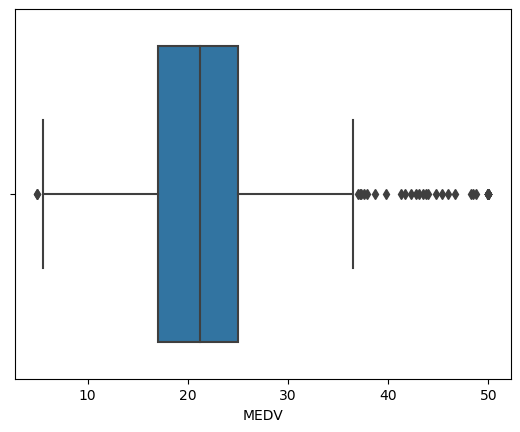

In [20]:
sns.boxplot(x=boston_df['MEDV'])

Provide a  bar plot for the Charles river variable

In [22]:
from collections import Counter

<AxesSubplot:>

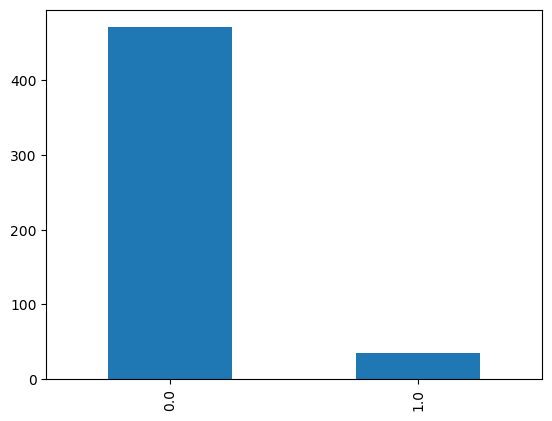

In [45]:
boston_df['CHAS'].value_counts().plot.bar()

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [47]:
boston_df['AGE'].max()

100.0

<AxesSubplot:xlabel='MEDV', ylabel='age_group'>

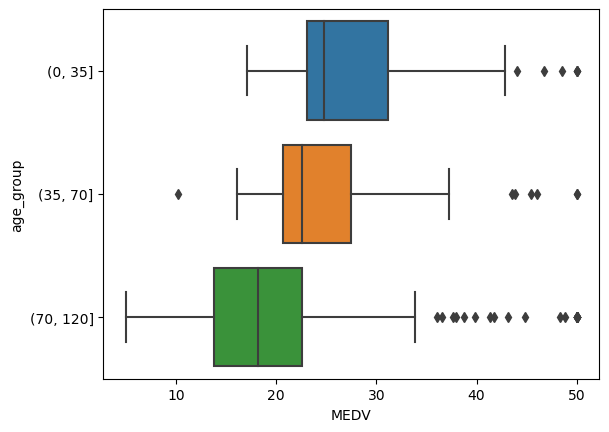

In [51]:
boston_df['age_group'] = pd.cut(boston_df['AGE'],bins=[0,35,70,120])
sns.boxplot(data=boston_df,x='MEDV',y='age_group')

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?



<AxesSubplot:xlabel='INDUS', ylabel='NOX'>

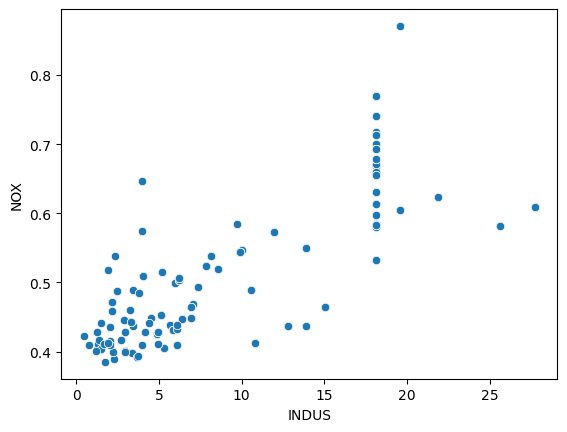

In [54]:
sns.scatterplot(data=boston_df,x='INDUS',y='NOX')


<AxesSubplot:xlabel='INDUS', ylabel='NOX'>

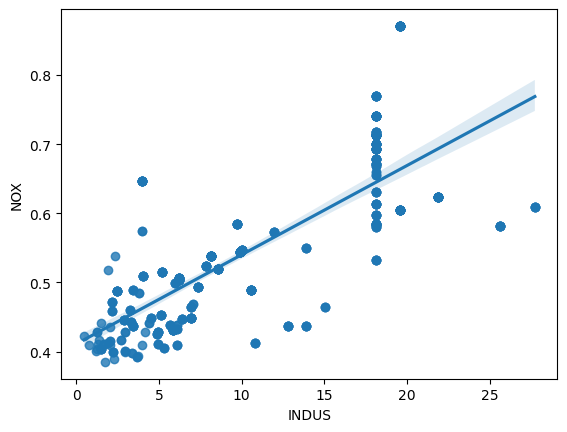

In [55]:
sns.regplot(data=boston_df,x='INDUS',y='NOX')

ANSWER:
With the help of the regression model of the SNS library, it is very easy to see a linear correlation between the proportion of non-retail business acres per town and the Nitric oxides concentration. 



Create a histogram for the pupil to teacher ratio variable

<AxesSubplot:xlabel='PTRATIO', ylabel='Count'>

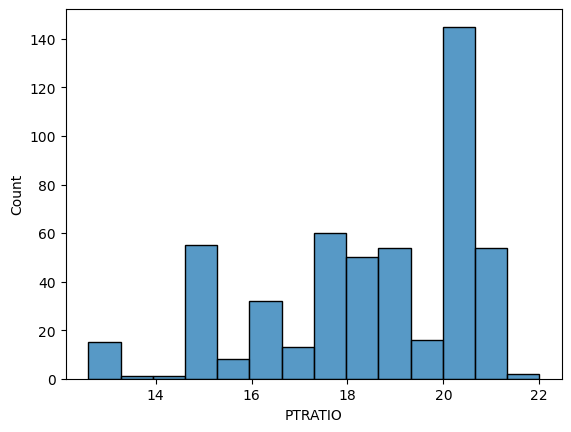

In [57]:
sns.histplot(data=boston_df['PTRATIO'])

# Task 5
* Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

* Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

* Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

* What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)


Be sure to:

*State your hypothesis.

*Use α = 0.05

*Perform the test Statistics.

*State the conclusion from the test.

* Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Null hypothesis: There is no significant difference in median value of houses bounded by the Charles River.

In [118]:
from scipy.stats import ttest_ind
from scipy.stats import probplot
from scipy.stats import levene
from matplotlib.pyplot import figure
alpha=0.05

In [72]:
dft=boston_df[['CHAS','MEDV']]

In [74]:
group1 = dft[dft['CHAS']==1.0]
group2 = dft[dft['CHAS']==0.0]

In [84]:
test,pvalue= ttest_ind(group1['MEDV'],group2['MEDV'])

In [87]:
pvalue>alpha

False

In [88]:
pvalue

7.390623170519905e-05

Since p-value is less the alpha, we reject the null hypothesis, and conclude that there is sufficient evidence that the proximity to the river does affect the median value of the houses.

* Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

<b> First step: check the normality assumption by plotting a normal probability plot each grouped variable </b>

In [90]:
Counter(boston_df['age_group'])

Counter({Interval(35, 70, closed='right'): 128,
         Interval(70, 120, closed='right'): 287,
         Interval(0, 35, closed='right'): 91})

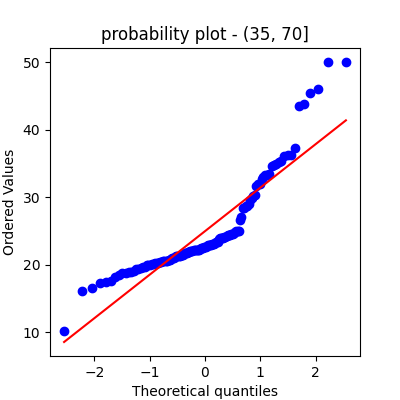

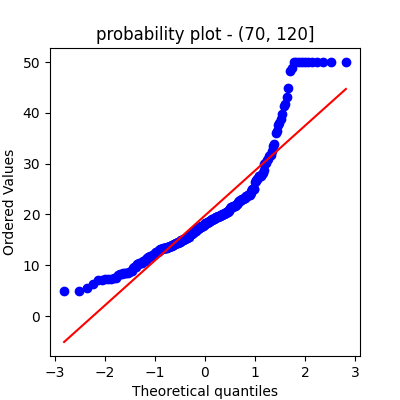

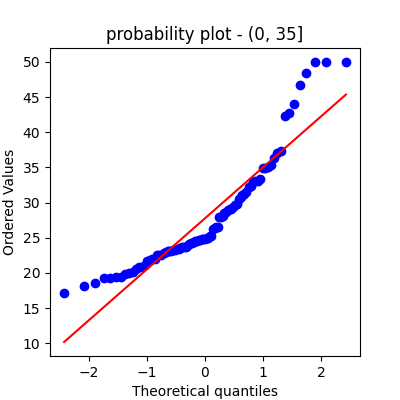

<Figure size 400x400 with 0 Axes>

In [100]:
figure(figsize=(4,4))
for age_group in boston_df['age_group'].unique():
    probplot(boston_df[boston_df['age_group']==age_group]['MEDV'],dist="norm",plot=pyplot)
    pyplot.title('probability plot - '+ str(age_group))
    pyplot.show()

For the sake of the exercise, we assume that the plots are close enough to a straight line.

<b> Homogeneity of Variance Assumption </b>

Null hypothesis: We assume that the there is no difference in variance between the three different age groups

In [127]:
dft2=boston_df[['age_group','MEDV']]

In [128]:
age_groups=boston_df['age_group'].unique()

In [129]:
levene(dft2[dft2['age_group']==age_groups[0]]['MEDV'],
dft2[dft2['age_group']==age_groups[1]]['MEDV'],
dft2[dft2['age_group']==age_groups[2]]['MEDV'],center='mean')

LeveneResult(statistic=2.78062002937483, pvalue=0.06295337343259205)

Since the p-value is larger than alpha(=0.05) we fail to reject the null hypothesis. Therefore we can assume that the variance in the three groups are homogenous enough to procceed with the ANOVA testing.

In [131]:
from scipy.stats import f_oneway as anova

Null hypothesis: There is no  significant difference in Median values of houses (MEDV) 
for each proportion of owner occupied units built prior to 1940 

In [132]:
anova(dft2[dft2['age_group']==age_groups[0]]['MEDV'],
dft2[dft2['age_group']==age_groups[1]]['MEDV'],
dft2[dft2['age_group']==age_groups[2]]['MEDV'])

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

Conclusion: as p-value is much lower than alpha(=0.05), we reject the null hypothesis,and conclude that we have sufficient evidence to say that the alternative hypothesis, that there is a difference between the age groups, is true.

** Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [133]:
from scipy.stats import pearsonr

In [138]:
result,pvalue = pearsonr(boston_df['INDUS'],boston_df['NOX'])

In [139]:
result

0.7636514469209189

We cannot conclude that there is no relationship between Nitric oxide concentration and the proportion of non-retail business acres in town.  A 0.76 correlation indicates a strong correlation between the datasets.

-----------

* What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)


In [142]:
dft3 = boston_df[['DIS','MEDV']]

In [145]:
dft3

,DIS,MEDV
0,4.0900,24.0
1,4.9671,21.6
2,4.9671,34.7
3,6.0622,33.4
4,6.0622,36.2
...,...,...
501,2.4786,22.4
502,2.2875,20.6
503,2.1675,23.9
504,2.3889,22.0


<AxesSubplot:xlabel='DIS', ylabel='MEDV'>

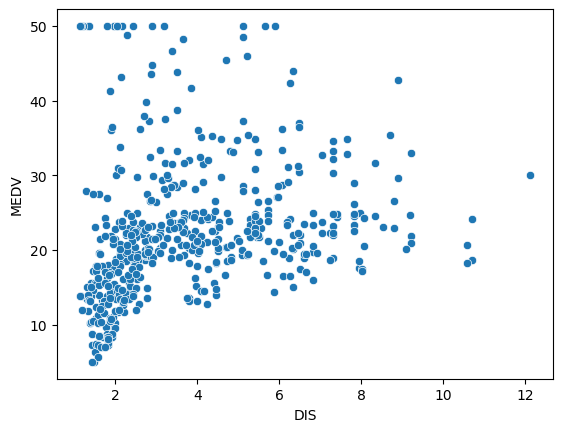

In [157]:
sns.scatterplot(dft3,x='DIS',y='MEDV')

The impact of the proximity to the five Boston employment centres is that the largest number of properties and also the properties with the highest and lowest MEDV are within the distance of 6 to the five employment centers.
So the proximity to the big employment centres has an impact on the number and the variance of the values. 
Properties further away seem to have a lower variance in value.
